In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_14488\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [6]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_14488\3470027329.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


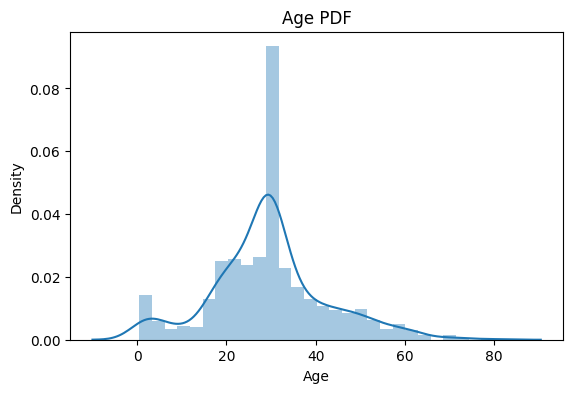

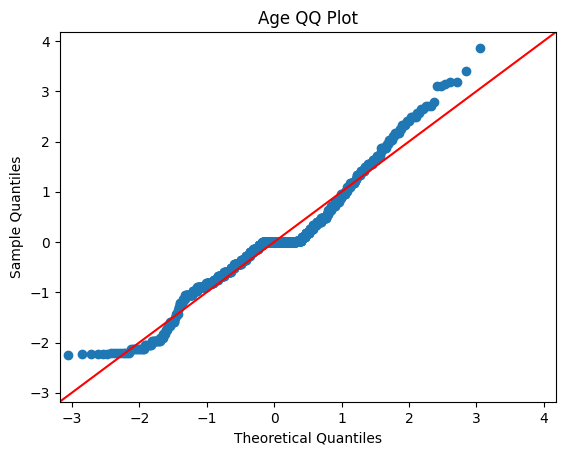

In [8]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

# plt.subplot(122)
sm.qqplot(df['Age'], line='45', fit=True)
plt.title('Age QQ Plot')

plt.show()

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_14488\3662552470.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


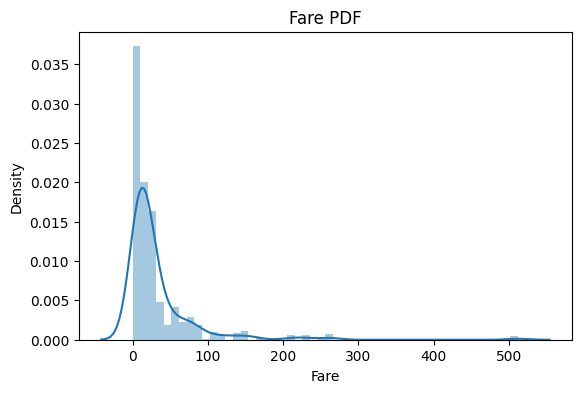

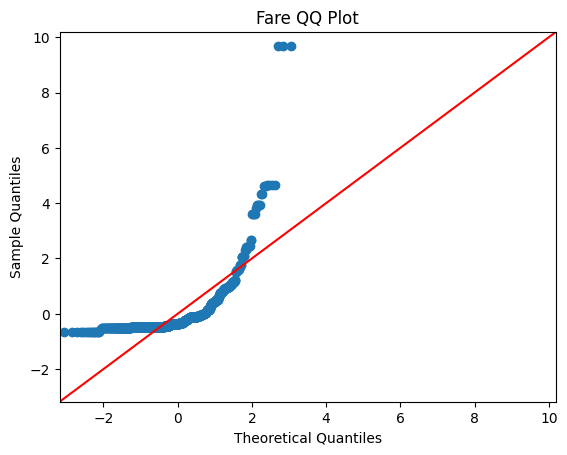

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

# plt.subplot(122)
sm.qqplot(df['Fare'], line='45', fit=True)
plt.title('Fare QQ Plot')

plt.show()

In [10]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [11]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred1 = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [12]:
print(f"The accuracy of Logistic Regression is: {accuracy_score(y_test, y_pred1)}")
print(f"The accuracy of Decision Tree is: {accuracy_score(y_test, y_pred2)}")

The accuracy of Logistic Regression is: 0.6480446927374302
The accuracy of Decision Tree is: 0.6871508379888268


In [13]:
trf = FunctionTransformer(func=np.log1p)

X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [14]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [15]:
clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred1 = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

In [16]:
print(f"The accuracy of Logistic Regression is: {accuracy_score(y_test, y_pred1)}")
print(f"The accuracy of Decision Tree is: {accuracy_score(y_test, y_pred2)}")

The accuracy of Logistic Regression is: 0.6815642458100558
The accuracy of Decision Tree is: 0.6871508379888268


In [17]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6644319600499375


C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_14488\1009663149.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_14488\1009663149.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed['Age'])


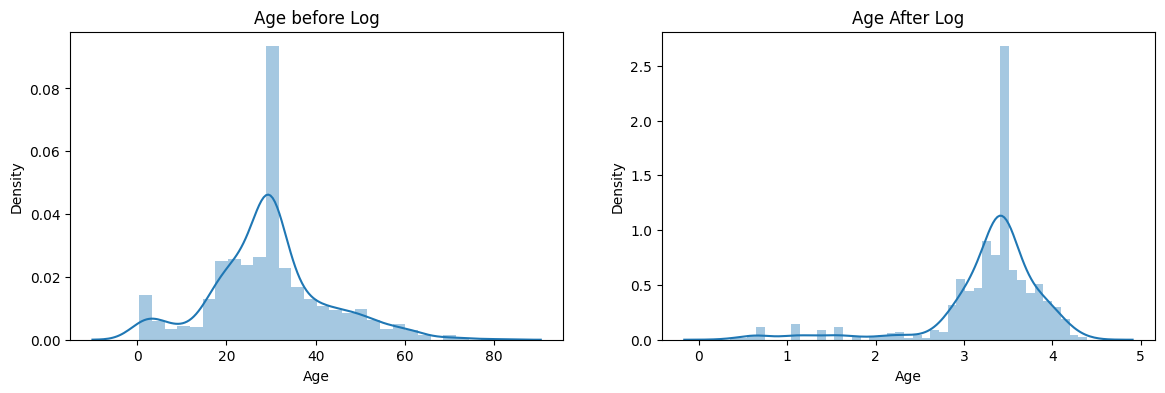

In [18]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age before Log')

plt.subplot(122)
sns.distplot(X_train_transformed['Age'])
plt.title('Age After Log')

plt.show()

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_14488\3413423401.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_14488\3413423401.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed['Fare'])


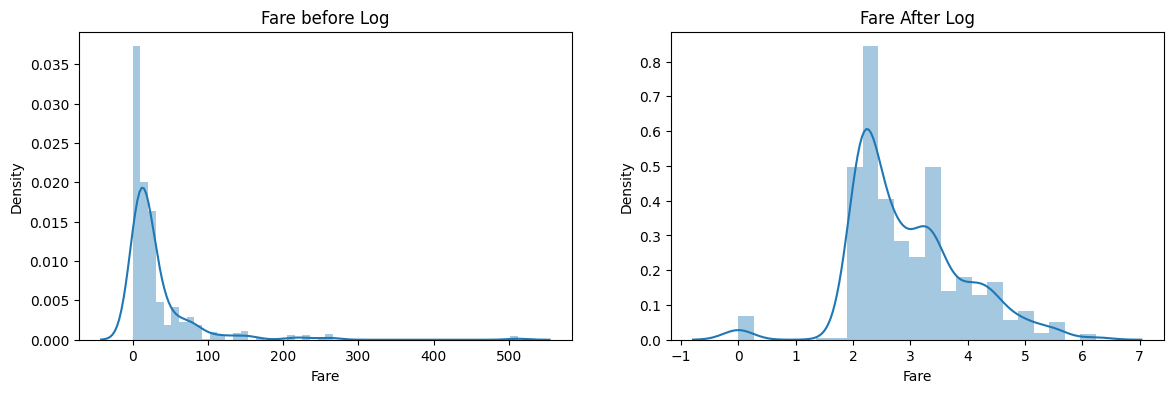

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare before Log')

plt.subplot(122)
sns.distplot(X_train_transformed['Fare'])
plt.title('Fare After Log')

plt.show()

# Applying Log transform only for fare

In [20]:
transformer = ColumnTransformer([
    ('logtrf', FunctionTransformer(func=np.log1p), ['Fare'])
], remainder='passthrough')

In [21]:
X_train_column_trf = transformer.fit_transform(X_train)
X_test_column_trf = transformer.transform(X_test)

In [22]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [23]:
clf.fit(X_train_column_trf, y_train)
clf2.fit(X_train_column_trf, y_train)

y_pred1 = clf.predict(X_test_column_trf)
y_pred2 = clf2.predict(X_test_column_trf)

In [24]:
print(f"The accuracy of Logistic Regression is: {accuracy_score(y_test, y_pred1)}")
print(f"The accuracy of Decision Tree is: {accuracy_score(y_test, y_pred2)}")

The accuracy of Logistic Regression is: 0.6703910614525139
The accuracy of Decision Tree is: 0.6536312849162011


In [25]:
X_transformed2 = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6588389513108615


In [33]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X['Fare'])
    plt.title('Fare before Log')

    plt.subplot(122)
    sns.distplot(X_transform['Fare'])
    plt.title('Fare After Log')

    plt.show()
    

In [39]:
def apply_transform(transform):
    X = df.iloc[:, 1:3]
    y = df.iloc[:, 0]

    trf = ColumnTransformer([('trf', FunctionTransformer(transform), ['Fare'])], remainder='passthrough')

    X_transform = trf.fit_transform(X)

    clf = LogisticRegression()

    print("LR",np.mean(cross_val_score(clf,X_transform,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X['Fare'])
    plt.title('Fare before Log')

    plt.subplot(122)
    sns.distplot(X_transform[:, 0])
    plt.title('Fare After Log')

    plt.show()

LR 0.6712609238451936


C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_14488\348173373.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['Fare'])
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_14488\348173373.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transform[:, 0])


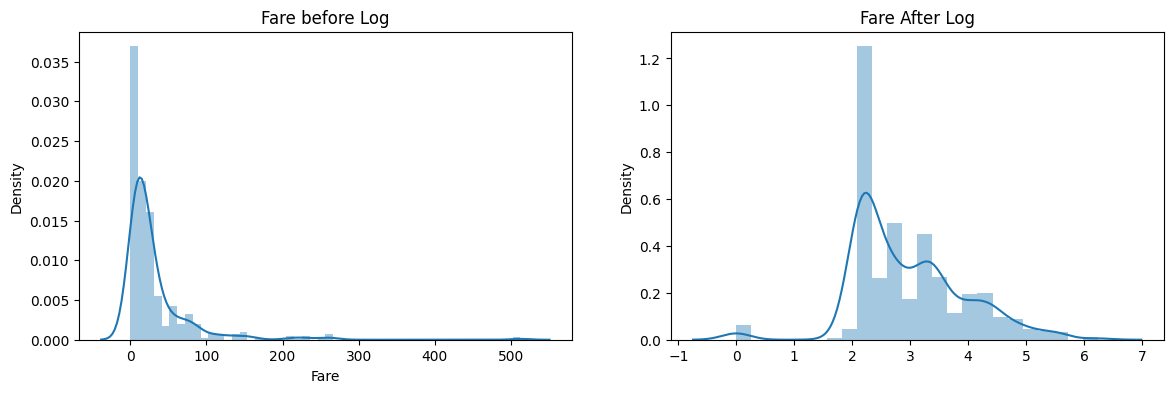

In [45]:
apply_transform(np.log1p)

# Applying of new dataset

In [46]:
data = pd.read_csv('concrete_data.csv')

In [47]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_14488\1768700206.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Strength'])


<Axes: xlabel='Strength', ylabel='Density'>

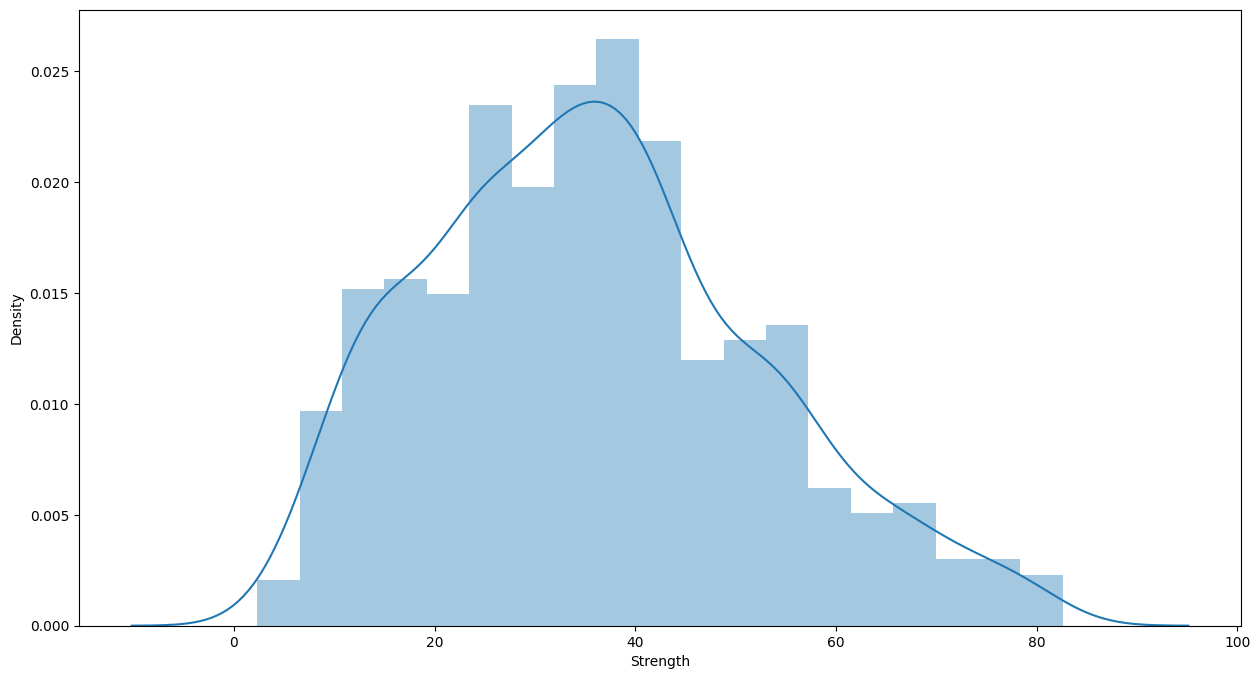

In [57]:
plt.figure(figsize=(15,8))
sns.distplot(data['Strength'])

In [58]:
data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [59]:
X = data.iloc[:, : -1]
y = data.iloc[:, -1]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
trf = ColumnTransformer([
    ('log', FunctionTransformer(np.log1p), [1,2,4,7])
],remainder='passthrough')

In [64]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [65]:
X_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3


C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_14488\2010412868.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_14488\2010412868.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_trf[:, 7])


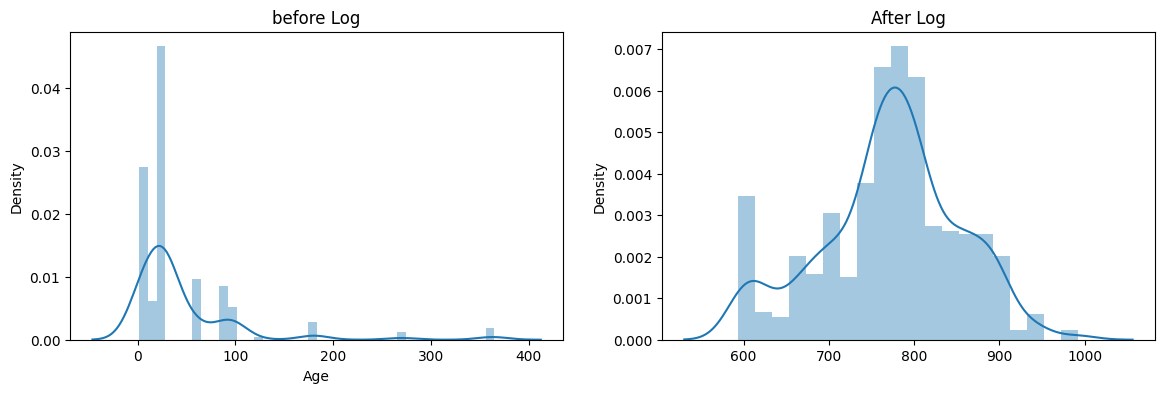

In [71]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('before Log')

plt.subplot(122)
sns.distplot(X_train_trf[:, 7])
plt.title('After Log')

plt.show()

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [75]:
lr = LinearRegression()
lr2 = LinearRegression()

lr.fit(X_train, y_train)
lr2.fit(X_train_trf, y_train)

y_pred1 = lr.predict(X_test)
y_pred2 = lr2.predict(X_test_trf)

In [78]:
print(f"LR: {mean_squared_error(y_test, y_pred1)}")
print(f"LR2: {mean_squared_error(y_test, y_pred2)}")

LR: 95.97094009110684
LR2: 46.65740773805527
